# 二维稳态导热问题


算例源自高等教育出版社《传热学》第四版，P173例4-2。

有一各向同性材料的方形物体，其导热系数为常量。

已知各边界的温度如图

```
        
          500
      ┌───────────┐
      |   |   |   |
      |───1───2───|
 100  |   |   |   | 100
      |───3───4───| 
      |   |   |   |
      └───────────┘  
           100
```

求内部网格节点1、2、3和4的温度


## 解题步骤：

* 1 划分网格

* 2 形成节点离散方程组

* 3 使用**numpy.linalg.solve**求解方程

* 4  输出结果、可视化温度分布


## numpy.linalg.solve 简介

* numpy.linalg.solve(a, b)

  Solve a linear matrix equation, or system of linear scalar equations.

  Computes the “exact” solution, x, of the well-determined, i.e., full rank,
  
  linear matrix equation **ax = b**

* Parameters:

  a : (..., M, M) array_like

* Coefficient matrix.

  b : {(..., M,), (..., M, K)}, array_like

  Ordinate or “dependent variable” values.

* Returns:

  x : {(..., M,), (..., M, K)} ndarray

  Solution to the system a x = b. Returned shape is identical to b.
 
   Raises:

   LinAlgError

   If a is singular or not square.
 
### Example:

$ Ax=b \tag{1}$ 

$$ A|b=
\left[
    \begin{array}{cc|c}
      3 & 1 & 9 \\
      1 & 2 & 8 
    \end{array}
\right] 
\tag{2}
$$

In [2]:
import numpy as np
a = np.array([[3,1], [1,2]])
b = np.array([9,8])
x = np.linalg.solve(a, b)
x

array([ 2.,  3.])

# 网格和节点离散方程

当前结点[r,c]

* r: row id

* c: col id

$ 4*nodes[r,c]-(nodes[r-1,c]+nodes[r+1,c]+nodes[r,c+1]+nodes[r,c-1])=0 $


**算例：**

   * 网格： $m*n=4*4$
 
   * 内部网格节点: 
       * 1: node[1,1] 
       * 2: node[1,2]
       * 3: node[2,1]
       * 4: node[2,2]

$$ At=b \tag{3}$$

$$ 
\left[
    \begin{array}{cccc}
      4 & -1 & -1 & 0 \\
      -1 & 4 & 0 & -1 \\
      -1 & 0 & 4 & -1 \\
       0 & -1 & -1 & 4 
    \end{array}
\right] 
\left[
    \begin{array}{c}
       node[1,1] \\
       node[1,2] \\
       node[2,1] \\
       node[2,2] 
    \end{array}
\right]
=
\left[
    \begin{array}{c}
       node[0,1]+node[1,0] \\
       node[0,2]+node[1,3] \\
       node[2,0]+node[3,1] \\
       node[2,3]+node[3,2] 
    \end{array}
\right]
\tag{4}
$$


# 求解程序

+-------+-------+
|   0   |   1   |
+-------+-------+
| 250.0 | 250.0 |
| 150.0 | 150.0 |
+-------+-------+


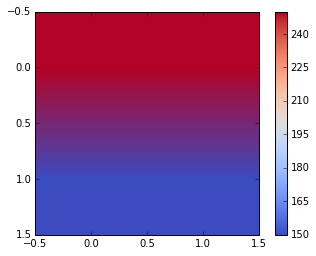

In [1]:
%matplotlib inline
# -*- coding: UTF-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
    
def get_temperaturegrid():
    """ get temperature grid """ 
    m=4 # row
    n=4 # col 

    # wall:
    #  col 0 left，n right
    node = np.zeros((m,n))
    #  row 0 top
    node[0,1],node[0,2]=500,500
    #  row m-1 bottom
    node[3,1],node[3,2]=100,100
    # left col 0
    node[1,0],node[2,0]=100,100
    # right n-1 
    node[1,3],node[2,3]=100,100

    a = np.array([
              [4,-1,-1,0],
              [-1,4,0,-1],
              [-1,0,4,-1],
              [0,-1,-1,4] 
             ])
    b = np.array([
             node[0,1]+node[1,0],
             node[0,2]+node[1,3],
             node[2,0]+node[3,1],
             node[2,3]+node[3,2]
             ]
             )
    t = np.linalg.solve(a, b)
 
    temperature=np.zeros((2,2))
    
    for i in range(2):
        temperature[i,0],temperature[i,1]= t[2*i],t[2*i+1]
 
    return temperature

def print_temperaturegrid(t):
    """ print temperature grid """  
    table = PrettyTable(["0","1"])  
    table.align= "c" # center
    table.padding_width = 1 # One space between column edges and contents (default)
    for i in range(2):
        table.add_row([t[i,0],t[i,1]])
    print(table)

def plot_temperaturegrid(t):
    """ plot temperature grid """ 
    plt.imshow(temperature,interpolation='bilinear', cmap=plt.get_cmap("coolwarm"))
    plt.colorbar()
    plt.show()

temperature=get_temperaturegrid() 
print_temperaturegrid(temperature)
plot_temperaturegrid(temperature)
